# Test the recovery of kinematics using spherical kinematics modeling

Xiangyu Huang, Stony Brook, 2024 May

Plot for comparison between axisymmetric kinematics model and spherical recovery using JAM. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
import matplotlib.patches as patches

from copy import deepcopy

from cycler import cycler
import matplotlib as mpl
clist = ['#04B2D9', '#F2B33D', '#F29966', '#F2441D', '#0486C5']
mpl.rcParams['axes.prop_cycle'] = cycler(color=clist)

## Access data

### mock data

In [2]:
data_oblate = np.load('../06-make_kin_mock_data/kin_mock_data/data_oblate.npy')
data_oblate_copy = deepcopy(data_oblate)

sigma_e_data_oblate = data_oblate_copy[2, :]
mean_sigma_e_data_oblate = np.mean(sigma_e_data_oblate)

data_prolate = np.load('../06-make_kin_mock_data/kin_mock_data/data_prolate.npy')
data_prolate_copy = deepcopy(data_prolate)

sigma_e_data_prolate = data_prolate_copy[2, :]
mean_sigma_e_data_prolate = np.mean(sigma_e_data_prolate)

### spherical recovery

In [3]:
vel_disp_sph_all_oblate = np.load('../09-kin_spherical_recovery/kin_sph_recovery_oblate_all.npy')
mean_vel_disp_sph_all_oblate = np.mean(vel_disp_sph_all_oblate)

vel_disp_sph_all_prolate = np.load('../09-kin_spherical_recovery/kin_sph_recovery_prolate_all.npy')
mean_vel_disp_sph_all_prolate = np.mean(vel_disp_sph_all_prolate)

In [4]:
def percent_err(x, x_ref):
    return (x - x_ref) / x_ref * 100

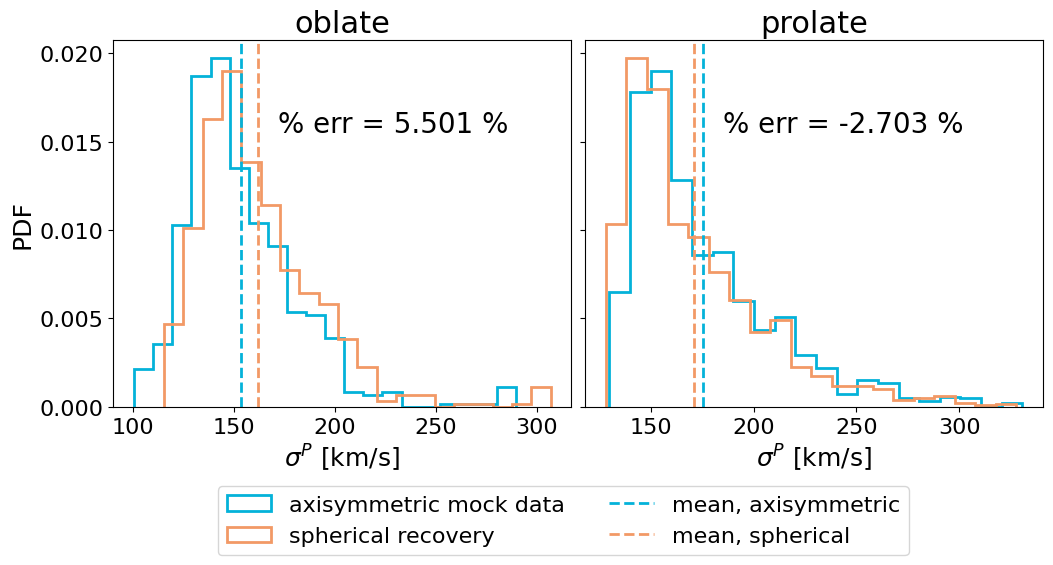

In [5]:
fig, axs = plt.subplots(1, 2, figsize = (12, 5), gridspec_kw={'wspace': 0.03})

for ax in axs:
    ax.tick_params(axis='both', labelsize = 16)
    ax.xaxis.label.set(fontsize=18)
    ax.yaxis.label.set(fontsize=18)
    ax.set_box_aspect(0.8)

color_axi = clist[0]
color_sph = clist[2]

axs[0].hist(sigma_e_data_oblate, density=True, lw=2, histtype='step', label = 'mock data', bins=20, color=color_axi)
axs[0].hist(vel_disp_sph_all_oblate, density=True, lw=2, histtype='step', label = 'spherical recovery', bins=20, color=color_sph)
axs[0].axvline(mean_sigma_e_data_oblate, ls = '--', color = color_axi, marker = ' ', label = 'mean, data', lw=2)
axs[0].axvline(mean_vel_disp_sph_all_oblate, ls = '--', color = color_sph, marker = ' ', label = 'mean, spherical', lw=2)
axs[0].set_xlabel(r'$\sigma^P$ [km/s]')
axs[0].set_ylabel('PDF')
axs[0].set_title('oblate', size = 22)
axs[0].set_yticks(np.arange(0, 0.025, 0.005))

axs[0].text(0.36, 0.75, '% err = {:.3f} %' .format(percent_err(mean_vel_disp_sph_all_oblate, mean_sigma_e_data_oblate)), transform = axs[0].transAxes, fontsize = 20)

axs[1].hist(sigma_e_data_prolate, density=True, lw=2, histtype='step', label = 'mock data', bins=20, color=color_axi)
axs[1].hist(vel_disp_sph_all_prolate, density=True, lw=2, histtype='step', label = 'spherical recovery', bins=20, color=color_sph)
axs[1].axvline(mean_sigma_e_data_prolate, ls = '--', color = color_axi, marker = ' ', label = 'mean, data', lw=2)
axs[1].axvline(mean_vel_disp_sph_all_prolate, ls = '--', color = color_sph, marker = ' ', label = 'mean, spherical', lw=2)
axs[1].set_xlabel(r'$\sigma^P$ [km/s]')
axs[1].set_title('prolate', size = 22)
axs[1].sharey(axs[0])
axs[1].label_outer()

axs[1].text(0.3, 0.75, '% err = {:.3f} %' .format(percent_err(mean_vel_disp_sph_all_prolate, mean_sigma_e_data_prolate)), transform = axs[1].transAxes, fontsize = 20)

dummy_lines = []
dummy_lines.append(patches.Patch(edgecolor=color_axi, facecolor='none', label = 'axisymmetric mock data', lw = 2))
dummy_lines.append(patches.Patch(edgecolor=color_sph, facecolor='none', label = 'spherical recovery', lw = 2))
dummy_lines.append(axs[0].plot([], [], color = color_axi, ls = '--', lw = 2, label = 'mean, axisymmetric')[0])
dummy_lines.append(axs[0].plot([], [], color = color_sph, ls = '--', lw = 2, label = 'mean, spherical')[0])

fig.legend(handles=dummy_lines, loc = 'lower center', bbox_to_anchor = (0.5, -0.19), ncol = 2, fontsize = 16)
plt.savefig('./recover_kinematics_sph.pdf', bbox_inches='tight', dpi=300)

plt.show()